<a href="https://colab.research.google.com/github/UdayPuligilla/AI-Driven-Insights-Machine-Learning-Models-for-Chronic-Kidney-Disease-Prediction/blob/main/Data_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded and cleaned.


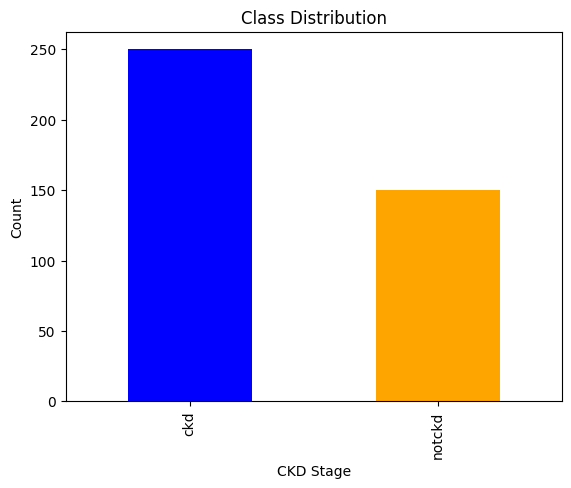

Blood Pressure capped between 50 and 180
Sodium capped between 135 and 145
Potassium capped between 3.5 and 6.0
Hemoglobin capped between 7 and 17
Serum Creatinine capped between 0.5 and 15
Blood Urea capped between 5 and 100
Packed Cell Volume capped between 20 and 54
White Blood Cell Count capped between 2200 and 11000
Red Blood Cell Count capped between 3.5 and 6.0


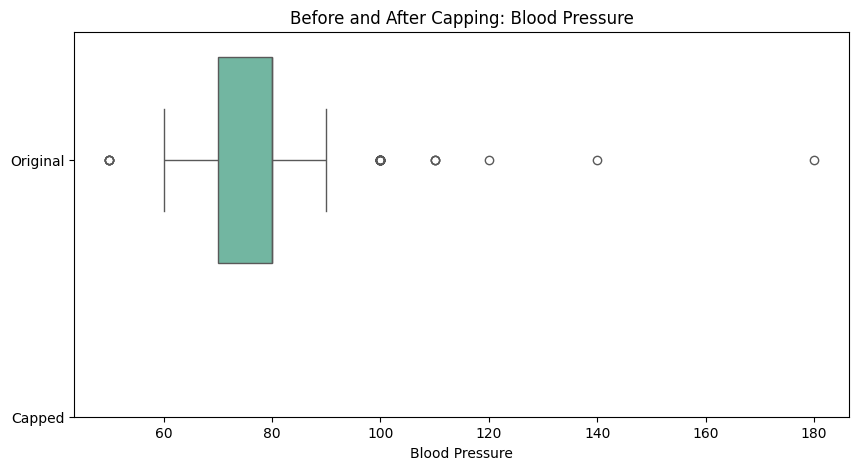

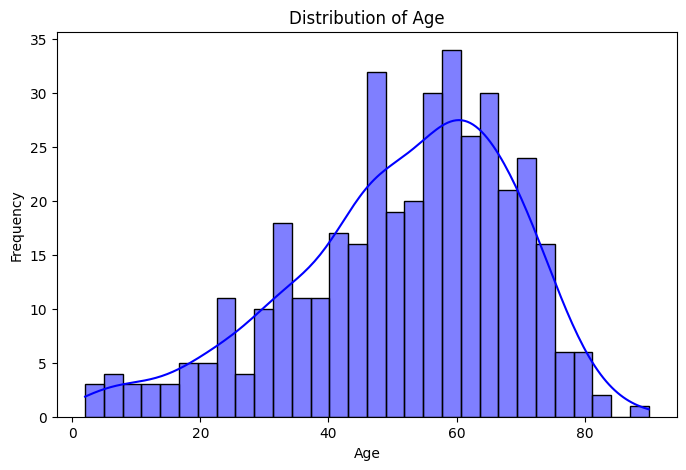

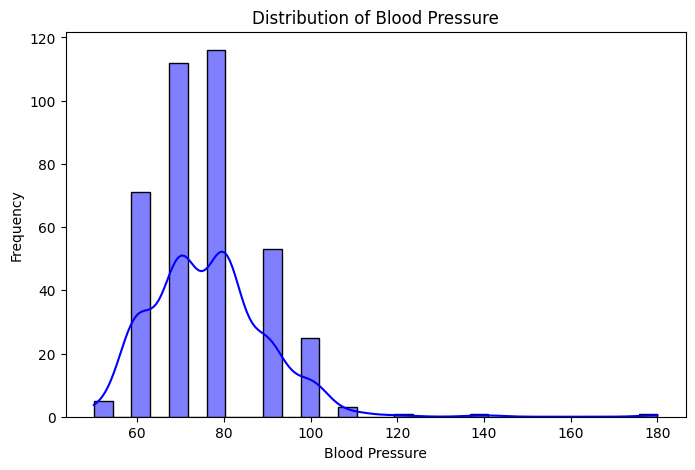

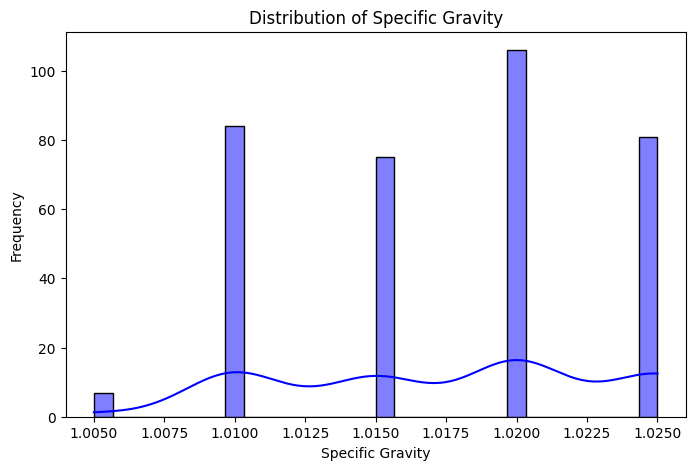

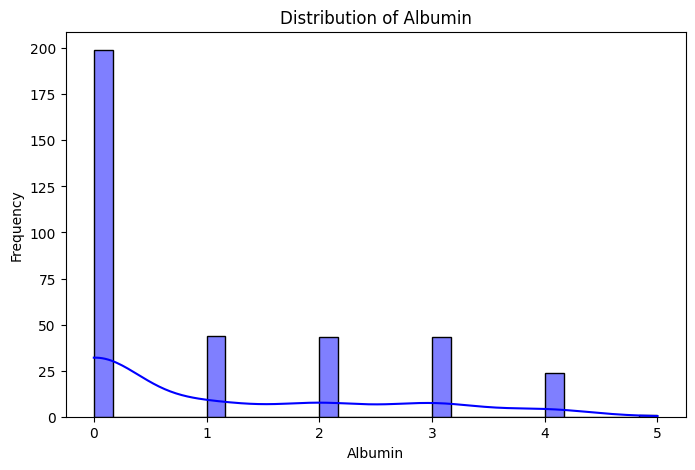

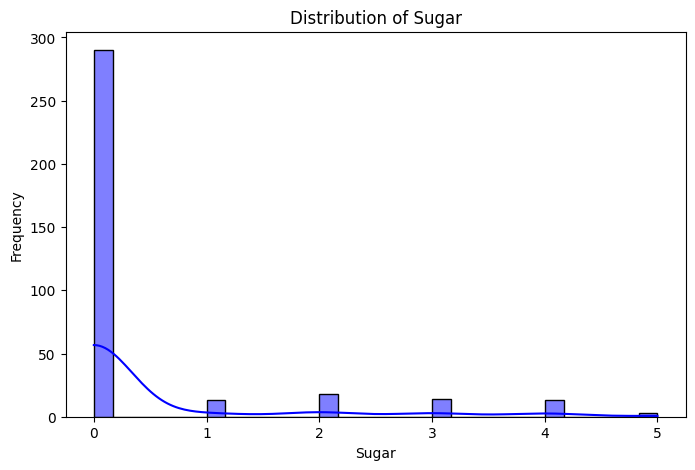

Original cleaned dataset size: (158, 25)
Missing values after KNN Imputation and encoding:
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
CKD Stage                  0
dtype: int64
Class distribution after SMOTE:
CKD Stage
0    250
1    250
Name: count, dtype: int64

Dataset shapes:
Original Cleaned Dataset: (158, 25)
Imputed Dataset: (400, 25)
SMOTE

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# File Paths
DATA_FILE_PATH = '/content/drive/MyDrive/Chronic kidney disease/chronic_kidney_disease (1).csv'
ORIGINAL_CLEANED_PATH = '/content/drive/MyDrive/Chronic kidney disease/datasets/original_cleaned.csv'
IMPUTED_PATH = '/content/drive/MyDrive/Chronic kidney disease/datasets/imputed.csv'
SMOTE_BALANCED_PATH = '/content/drive/MyDrive/Chronic kidney disease/datasets/smote_balanced.csv'

# Column Mapping
COLUMN_MAPPING = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'class': 'CKD Stage'
}

# Medically Accepted Ranges
MEDICAL_THRESHOLDS = {
    'Blood Pressure': (50, 180),
    'Sodium': (135, 145),
    'Potassium': (3.5, 6.0),
    'Hemoglobin': (7, 17),
    'Serum Creatinine': (0.5, 15),
    'Blood Urea': (5, 100),
    'Packed Cell Volume': (20, 54),
    'White Blood Cell Count': (2200, 11000),
    'Red Blood Cell Count': (3.5, 6.0)
}

# Load and clean data
def load_and_clean_data(file_path, column_mapping):
    ckd_data = pd.read_csv(file_path)
    ckd_data = ckd_data.rename(columns=column_mapping)
    ckd_data['Diabetes Mellitus'] = ckd_data['Diabetes Mellitus'].replace('\tno', 'no')
    ckd_data['CKD Stage'] = ckd_data['CKD Stage'].replace('ckd\t', 'ckd')
    print("Dataset loaded and cleaned.")
    return ckd_data

# Apply medically accepted capping
def apply_medical_capping(df, thresholds):
    df_capped = df.copy()
    for feature, (lower, upper) in thresholds.items():
        if feature in df_capped.columns:
            df_capped[feature] = df_capped[feature].clip(lower=lower, upper=upper)
            print(f"{feature} capped between {lower} and {upper}")
    return df_capped

# Create Original Cleaned Dataset
def create_original_cleaned_dataset(df):
    original_cleaned = df.dropna()
    print(f"Original cleaned dataset size: {original_cleaned.shape}")
    return original_cleaned

# Perform KNN Imputation for Numerical Features and Most Frequent for Categorical
def create_imputed_dataset(df):
    # Separate numerical and categorical features
    numerical_features = df.select_dtypes(include=['float', 'int']).columns
    categorical_features = df.select_dtypes(include=['object']).columns

    # Impute numerical features with KNNImputer
    knn_imputer = KNNImputer(n_neighbors=5)
    df[numerical_features] = knn_imputer.fit_transform(df[numerical_features])

    # Impute categorical features with the most frequent strategy
    for col in categorical_features:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Encode categorical features with LabelEncoder
    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    print(f"Missing values after KNN Imputation and encoding:\n{df.isnull().sum()}")
    return df

# Apply SMOTE to Balance Dataset
def create_smote_balanced_dataset(df):
    smote = SMOTE(random_state=42)
    X = df.drop(columns=['CKD Stage'])
    y = df['CKD Stage']
    X_smote, y_smote = smote.fit_resample(X, y)
    smote_balanced_df = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['CKD Stage'])], axis=1)
    print(f"Class distribution after SMOTE:\n{smote_balanced_df['CKD Stage'].value_counts()}")
    return smote_balanced_df

# Visualize outliers before and after capping
def visualize_class_distribution(df, target_column='CKD Stage'):
    """Visualize the class distribution in the dataset."""
    class_counts = df[target_column].value_counts()
    class_counts.plot(kind='bar', color=['blue', 'orange'], title="Class Distribution")
    plt.xlabel("CKD Stage")
    plt.ylabel("Count")
    plt.show()

def visualize_feature_distributions(df, numerical_features):
    """Visualize the distribution of numerical features."""
    for feature in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

def visualize_outliers(df, numerical_features):
    """Visualize outliers using boxplots for numerical features."""
    for feature in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[feature], color='green')
        plt.title(f"Boxplot of {feature}")
        plt.xlabel(feature)
        plt.show()

def visualize_capping(feature, original_df, capped_df):
    """Visualize the effect of capping on outliers for a given feature."""
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[original_df[feature], capped_df[feature]], orient='h', palette='Set2')
    plt.yticks([0, 1], ["Original", "Capped"])
    plt.title(f"Before and After Capping: {feature}")
    plt.xlabel(feature)
    plt.show()


def visualize_pairplot(df, numerical_features, target_column='CKD Stage'):
    """Visualize pairwise relationships between numerical features."""
    sns.pairplot(df, vars=numerical_features, hue=target_column, palette="husl", diag_kind="kde")
    plt.suptitle("Pairwise Relationships of Numerical Features", y=1.02)
    plt.show()

def visualize_feature_importance(feature_importances, feature_names):
    """Visualize feature importance."""
    sorted_idx = feature_importances.argsort()
    plt.figure(figsize=(10, 8))
    plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance Visualization")
    plt.show()

# Main Function
def main():
    # Load and clean data
    ckd_data = load_and_clean_data(DATA_FILE_PATH, COLUMN_MAPPING)

    # Visualize class distribution before cleaning
    visualize_class_distribution(ckd_data)

    # Apply medically accepted capping
    ckd_data_capped = apply_medical_capping(ckd_data, MEDICAL_THRESHOLDS)

    # Visualize capping for a sample feature
    visualize_capping("Blood Pressure", ckd_data, ckd_data_capped)

    # Visualize numerical feature distributions
    numerical_features = ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar']
    visualize_feature_distributions(ckd_data_capped, numerical_features)

    # Create Original Cleaned Dataset
    original_cleaned = create_original_cleaned_dataset(ckd_data_capped)


    # Create Imputed Dataset
    imputed = create_imputed_dataset(ckd_data_capped)

    # Create SMOTE-Balanced Dataset
    smote_balanced = create_smote_balanced_dataset(imputed)

    # Ensure directory exists
    output_dir = os.path.dirname(ORIGINAL_CLEANED_PATH)
    os.makedirs(output_dir, exist_ok=True)

    # Save Datasets
    original_cleaned.to_csv(ORIGINAL_CLEANED_PATH, index=False)
    imputed.to_csv(IMPUTED_PATH, index=False)
    smote_balanced.to_csv(SMOTE_BALANCED_PATH, index=False)

    # Print dataset shapes
    print("\nDataset shapes:")
    print(f"Original Cleaned Dataset: {original_cleaned.shape}")
    print(f"Imputed Dataset: {imputed.shape}")
    print(f"SMOTE-Balanced Dataset: {smote_balanced.shape}")

# Run Main
if __name__ == "__main__":
    main()
